In [84]:
import numpy as np
import math
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.constants as sc
import sys
from sympy import *
from sympy import Matrix
from sympy.physics.wigner import wigner_3j



def Mat(B):
    L=0
    J=1/2
    I=1/2
    nj=2
    ni=2
    mJ=np.arange(-J,J+1,1,dtype=float)
    mI=np.arange(-I,I+1,1,dtype=float)
    ##params
    A=-9.9254535546e9*2*np.pi; mB = 1.39962e6; gI=0.048
    gJ = 1+(J*(J+1)+3/4-L*(L+1))/(2*J*(J+1))
    H = np.zeros((ni*nj,ni*nj),float)
    for i in range(ni):
        for j in range(nj):
            H[j+i*nj,j+i*nj]=A*mJ[j]*mI[i]+mB*(gJ*mJ[j]+(sc.m_e/sc.m_p)*gI*mI[i])*B
            if j > 0 and i < ni-1:
                H[j-1+(i+1)*nj,j+i*nj]= A*.5*math.sqrt((J-mJ[j]+1)*(J+mJ[j])*(I+mI[i]+1)*(I-mI[i]))
            if j < nj-1 and i > 0:
                H[j+1+(i-1)*nj,j+i*nj]= A*.5*math.sqrt((J+mJ[j]+1)*(J-mJ[j])*(I-mI[i]+1)*(I+mI[i]))
    return H

def column(matrix, i):
    return [row[i] for row in matrix]

In [85]:

def Mat2(B):
    L=1
    J=1/2
    I=1/2
    nj=2
    ni=2
    mJ=np.arange(-J,J+1,1,dtype=float)
    mI=np.arange(-I,I+1,1,dtype=float)
    ##params
    A=-1.84e9*2*np.pi; mB = 1.39962e6; gI=0.048

    gJ = 1+(J*(J+1)+3/4-L*(L+1))/(2*J*(J+1))
    H = np.zeros((ni*nj,ni*nj),float)
    for i in range(ni):
        for j in range(nj):
            H[j+i*nj,j+i*nj]=A*mJ[j]*mI[i]+mB*(gJ*mJ[j]+(sc.m_e/sc.m_p)*gI*mI[i])*B+607e12*np.pi*2
            if j > 0 and i < ni-1:
                H[j-1+(i+1)*nj,j+i*nj]= A*.5*math.sqrt((J-mJ[j]+1)*(J+mJ[j])*(I+mI[i]+1)*(I-mI[i]))
            if j < nj-1 and i > 0:
                H[j+1+(i-1)*nj,j+i*nj]= A*.5*math.sqrt((J+mJ[j]+1)*(J-mJ[j])*(I-mI[i]+1)*(I+mI[i]))
    return H

def column(matrix, i):
    return [row[i] for row in matrix]


In [86]:
x = Mat2(5)

Matrix(x/(1e9*2*np.pi))


Matrix([
[606999.539628725,              0.0,              0.0,              0.0],
[             0.0, 607000.460371246,            -0.92,              0.0],
[             0.0,            -0.92, 607000.459628754,              0.0],
[             0.0,              0.0,              0.0, 606999.540371275]])

In [93]:
n = 8
num=100
efact=.1
SE=np.zeros((num,n))
SE2=np.zeros((num,n))

ef=np.arange(0,num*efact,efact)
diffss=np.zeros(num)
d = 2*np.pi*(607-563)*1e12
d2 = 2*np.pi*(658-563)*1e12

for i in range(num):
    x = Mat(i*efact)
    x2 = Mat2(i*efact)
    In = 2*.11/(np.pi*(30e-6)**2)
    E = np.sqrt(2*In/(sc.c*sc.epsilon_0))
    E2 = 0
    c1 = wigner_3j(1/2, 1, 1/2, -1/2, 1 , -1/2)*np.sqrt(2)*(-1)

    w0 = 2*np.pi*607e12

    gam=2*np.pi*15.4e6
    gam2=2*np.pi*18.8e6

    a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
    mu = np.sqrt(gam*3*sc.c**2/(4*a*w0**3))*c1

    H = np.zeros((n,n), float)
    H[1:3,1:3] = x[1:3,1:3]
    H[5:7,5:7] = x2[1:3,1:3]
    H = H*sc.hbar
    H[1,5] = H[5,1]= E*mu/2*sqrt((w0/d))*2
    H[2,6] = H[6,2]= E*mu/2*sqrt((w0/d))*2
    w,v = eigh(H) 
    SE[i] = w/(1e9*2*np.pi*sc.hbar)

    
    H2 = np.zeros((n,n), float)
    H2[1:3,1:3] = x[1:3,1:3]
    H2[5:7,5:7] = x2[1:3,1:3]
    H2 = H2*sc.hbar
    H2[1,5] = H2[5,1]= E2*mu/2*sqrt((w0/d))*2
    H2[2,6] = H2[6,2]= E2*mu/2*sqrt((w0/d))*2
    w2,v2 = eigh(H2) 
    SE2[i] = w2/(1e9*2*np.pi*sc.hbar)
    
    diffss[i] = -(column(SE,5)[i]-column(SE2,5)[i])*1e9+(column(SE,0)[i]-column(SE2,0)[i])*1e9
    

print(abs((column(SE,6)[0]-column(SE,0)[0])*1e9)-abs(A/(2*np.pi)))
print( -(column(SE,2)[0]-column(SE2,2)[0])*1e9)
print( -(column(SE,1)[0]-column(SE2,1)[0])*1e9)
print( -(column(SE,5)[0]-column(SE2,5)[0])*1e9)
print( -(column(SE,0)[0]-column(SE2,0)[0])*1e9)
print(SE2[50])
Matrix(H/(1e9*2*np.pi*sc.hbar))


606992097583297.2
-0.0
0.005582973576330462
836743.3224991672
836732.1768236735
[-2.48136351e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.44409029e+00  6.06999540e+05  6.07001380e+05]


Matrix([
[0.0,              0.0,              0.0, 0.0, 0.0,              0.0,              0.0, 0.0],
[0.0, 2.48356864859545,    -4.9627267773, 0.0, 0.0, 22.5365948948277,              0.0, 0.0],
[0.0,    -4.9627267773, 2.47915812870455, 0.0, 0.0,              0.0, 22.5365948948277, 0.0],
[0.0,              0.0,              0.0, 0.0, 0.0,              0.0,              0.0, 0.0],
[0.0,              0.0,              0.0, 0.0, 0.0,              0.0,              0.0, 0.0],
[0.0, 22.5365948948277,              0.0, 0.0, 0.0, 607000.460735067,            -0.92, 0.0],
[0.0,              0.0, 22.5365948948277, 0.0, 0.0,            -0.92, 607000.459264933, 0.0],
[0.0,              0.0,              0.0, 0.0, 0.0,              0.0,              0.0, 0.0]])

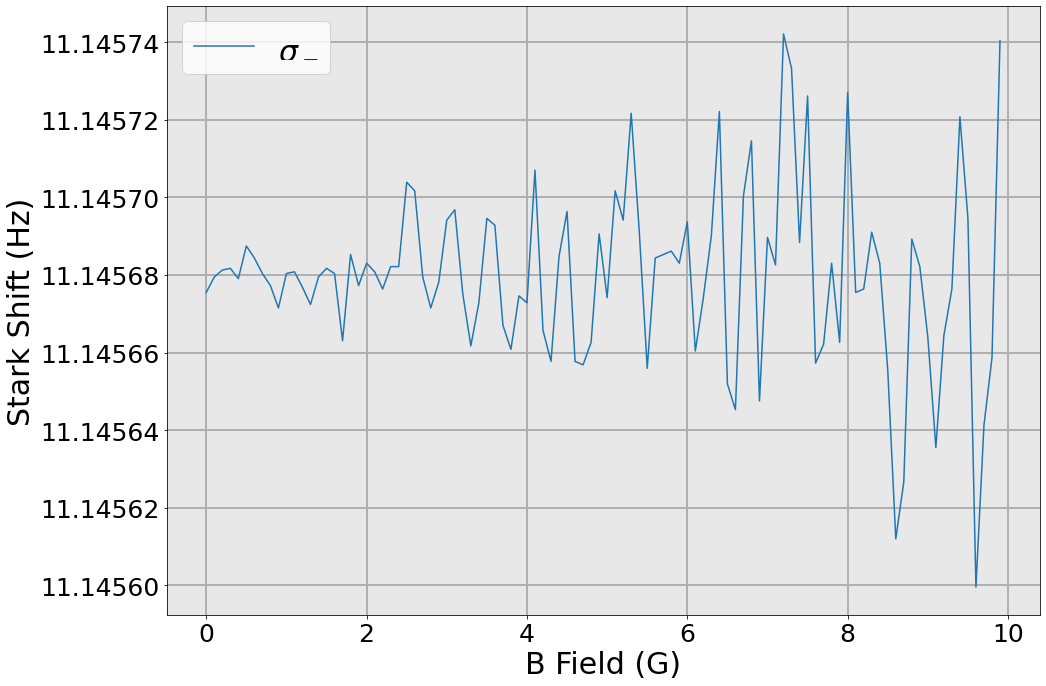

11.1456754936371 0.0


In [94]:

##Plotting Results###
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 22})

fig = plt.figure()
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
ax.patch.set_facecolor('lightgrey')
ax.patch.set_alpha(.5)
plt.xlabel("B Field (G)",fontsize=30)
plt.ylabel("Stark Shift (Hz)",fontsize=30)


plt.plot(ef,diffss, label = '$\sigma_-$')
# plt.plot(ef,diffss2, label = '$\sigma_+$')

plt.legend(loc="upper left",fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(linewidth=2)
plt.tight_layout()
plt.show()

print(diffss[0], diffss2[0])

In [89]:
827.7627751294058

827.7627751294058

In [90]:
n = 8
num=50
efact=.1
SE=np.zeros((num,n))
SE2=np.zeros((num,n))

ef=np.arange(0,num*efact,efact)
diffss2=np.zeros(num)
d = 2*np.pi*(607-563)*1e12

for i in range(num):
    x = Mat(i*efact)
    In = 2*.11/(np.pi*(30e-6)**2)
    E = np.sqrt(2*In/(sc.c*sc.epsilon_0))
    E2 = 0
    c1 = wigner_3j(1/2, 1, 1/2, -1/2, 1 , -1/2)*np.sqrt(2)*(-1)                                                       
    w0 = 2*np.pi*607e12
    gam=2*np.pi*15.4e6
    a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
    mu = np.sqrt(gam*3*sc.c**2/(4*a*w0**3))*c1

    H = np.zeros((6,6), float)
    H[1:3,1:3] = x[1:3,1:3]
    H[4,4] = 2*np.pi*(607e12)
    H[5,5] = 2*np.pi*(658e12)

    H = H*sc.hbar
#     H[1,4] = H[4,1]= E*mu/2*sqrt((w0/d))*2
    H[2,4] = H[4,2]= -E*mu/2*sqrt((w0/d))*2
    w,v = eigh(H) 
    SE[i] = w/(1e9*2*np.pi*sc.hbar)

    
    H2 = np.zeros((6,6), float)
    H2[1:3,1:3] = x[1:3,1:3]
    H2[4,4] = 2*np.pi*(607e12)
    H2[5,5] = 2*np.pi*(658e12)

    H2 = H2*sc.hbar
#     H2[1,4] = H2[4,1]= E2*mu/2*sqrt((w0/d))*sqrt(2)
    H[2,4] = H[4,2]= -E2*mu/2
    w2,v2 = eigh(H2) 
    SE2[i] = w2/(1e9*2*np.pi*sc.hbar)

    diffss2[i] = -(column(SE,3)[i]-column(SE2,3)[i])*1e9+(column(SE,0)[i]-column(SE2,0)[i])*1e9
    

print( -(column(SE,3)[0]-column(SE2,3)[0])*1e9)
print( -(column(SE,0)[0]-column(SE2,0)[0])*1e9)


ValueError: could not broadcast input array from shape (6,) into shape (8,)